In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from core.histogram_builder import *
from data.hlf_dataset_utils import load_data, feature_names


In [99]:
data_path = '/home/oliverkn/pro/data/hlf_set_new'
max_samples=int(1000e4)

sm_list = ['Wlnu', 'qcd', 'Zll', 'ttbar']
bsm_list = ['Ato4l', 'leptoquark', 'hToTauTau', 'hChToTauNu']
set_list = sm_list + bsm_list + ['sm_mix']

data = {}
for set in set_list:
    print('loading ' + set)
    x = load_data(data_path, name=set, set='valid')
    if x.shape[0] > max_samples:
        x = x[:max_samples]
    data[set] = x

loading Wlnu
loading qcd
loading Zll
loading ttbar
loading Ato4l
loading leptoquark
loading hToTauTau
loading hChToTauNu
loading sm_mix


In [105]:
cont_bins = 50
hist_settings = {}
hist_settings['HT'] = {'symbol': r'Jets-$p_T$ scalar sum $H_T$ [GeV]', 'range': (0, 2000), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['mass_jet'] = {'symbol': 'Jets Mass $M_J$ [GeV]', 'range': (0, 3000), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['n_jet'] = {'symbol': r'Number of jets $N_J$', 'range': (0, 10), 'yscale': 'linear', 'int': True, 'bin_size': 1}
hist_settings['n_bjet'] = {'symbol': r'Number of b-tagged jets $N_b$', 'range': (0, 6), 'yscale': 'linear', 'int': True, 'bin_size': 1}
hist_settings['lep_pt'] = {'symbol': r'Selected lepton $p_T^l$', 'range': (20, 600), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['lep_eta'] = {'range': (-2.5, 2.5), 'yscale': 'linear', 'bins': cont_bins, 'int': False}
hist_settings['lep_charge'] = {'symbol': r'Selected lepton charge $q_l$','range': (-1, 1), 'yscale': 'linear', 'int': True}
hist_settings['lep_is_ele'] = {'symbol':r'Selected lepton IsEle', 'range': (0, 1), 'yscale': 'linear', 'int': True}
hist_settings['lep_iso_ch'] = {'symbol':r'Charged isolation $Iso_{ch}^l$','range': (0, 0.1), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['lep_iso_neu'] = {'symbol':r'Neutral isolation $Iso_{neu}^l$','range': (0, 0.1), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['lep_iso_gamma'] = {'symbol':r'Photon isolation $Iso_{\gamma}^l$','range': (0, 0.1), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['MET'] = {'range': (0, 1000), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['METo'] = {'symbol':r'$p_{T,\perp}^{miss}$','range': (-100, 100), 'yscale': 'linear', 'bins': cont_bins, 'int': False}
hist_settings['METp'] = {'symbol':r'$p_{T,\parallel}^{miss}$','range': (-100, 100), 'yscale': 'linear', 'bins': cont_bins, 'int': False}
hist_settings['MT'] = {'symbol':r'Combined invariant mass $M_T$', 'range': (0, 200), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['n_mu'] = {'symbol':r'Number of muons $N_\mu$','range': (0, 6), 'yscale': 'linear', 'int': True, 'bin_size': 1}
hist_settings['pt_mu'] = {'symbol':r'Total muons $p_{T,TOT}^\mu$','range': (0, 600), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['mass_mu'] = {'symbol':r'Total muons $M_\mu$','range': (0, 600), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['n_ele'] = {'symbol':r'Number of electrons $N_{ele}$','range': (0, 6), 'yscale': 'linear', 'int': True, 'bin_size': 1}
hist_settings['pt_ele'] = {'symbol':r'Total electrons $p_{T,TOT}^e$','range': (0, 600), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['mass_ele'] = {'symbol':r'Total electrons $M_e$','range': (0, 600), 'yscale': 'log', 'bins': cont_bins, 'int': False}
hist_settings['n_neu'] = {'symbol':r'Number of neutral hadrons $N_{neu}$','range': (0, 400), 'yscale': 'linear', 'int': True, 'bin_size': 10}
hist_settings['n_ch'] = {'symbol':r'Number of charged hadrons $N_{ch}$','range': (0, 700), 'yscale': 'linear', 'int': True, 'bin_size': 10}
hist_settings['n_photon'] = {'range': (0, 1000), 'yscale': 'linear', 'int': True, 'bin_size': 10}

x_disc =  [ 'HT', 'METp', 'METo', 'MT', 'n_jet',
            'n_bjet', 'mass_jet', 'lep_pt', 'lep_eta',
            'lep_iso_ch', 'lep_iso_gamma', 'lep_iso_neu', 'lep_charge',
            'lep_is_ele', 'n_mu', 'mass_mu', 'pt_mu', 'n_ele',
            'mass_ele', 'pt_ele', 'n_ch', 'n_neu', 'n_photon']

# create ordered dict
hist_settings_ordered = {}
for q in x_disc:
    hist_settings_ordered[q] = hist_settings[q]

In [101]:
plot_size = 3

feature_list = ['HT', 'mass_jet', 'n_jet', 
                'n_bjet', 'n_neu', 'n_ch',
                'lep_pt', 'lep_charge', 'lep_is_ele',
                'lep_iso_ch', 'lep_iso_neu', 'lep_iso_gamma',
                'METo', 'METp', 'MT', 
                'n_mu', 'pt_mu', 'mass_mu', 
                'n_ele', 'pt_ele', 'mass_ele']

label_dict = {}
label_dict['sm_mix']='SM-mix'
label_dict['Wlnu']=r'$W\rightarrow l\nu$'
label_dict['qcd']='QCD'
label_dict['Zll']=r'$Z\rightarrow ll$'
label_dict['ttbar']=r'$t\bar{t}$'
label_dict['Ato4l']=r'$A\rightarrow 4l$'
label_dict['leptoquark']='LQ'
label_dict['hToTauTau']=r'$h^{0}\rightarrow \tau\tau$'
label_dict['hChToTauNu']=r'$h^{\pm}\rightarrow \tau\nu$'

color_dict = {}
color_dict['sm_mix']='lightsteelblue'
color_dict['Wlnu']='black'
color_dict['qcd']='red'
color_dict['Zll']='blue'
color_dict['ttbar']='limegreen'

color_dict['Ato4l']='black'
color_dict['leptoquark']='red'
color_dict['hToTauTau']='blue'
color_dict['hChToTauNu']='limegreen'


In [ ]:
hist_dict = {}

for set in set_list:
    print('building ' + set)
    x = data[set]
    
    hist_builder = HistogramBuilder(hist_settings_ordered)
    hist_builder.add_data(x)
    
    hist_dict[set] = hist_builder.get_histogram_data()
    

In [116]:
def plot(proc_list, output_file):
    fig, ax_arr = plt.subplots(7, 3, figsize=(3*plot_size, 7*0.55*plot_size))
    
    for i, feature in enumerate(feature_list):
        print('%d %s' % (i, feature))
        
        f_setting = hist_settings[feature]
        ax = ax_arr[i//3, i%3]
        
        # plot sm-mix
        bin_edges = hist_dict['sm_mix'][feature].bin_edges
        bin_content = hist_dict['sm_mix'][feature].bin_content
        ax.hist(bin_edges[:-1], bin_edges, weights=bin_content, 
                histtype='stepfilled', density=True, label=label_dict['sm_mix'], color=color_dict['sm_mix'])
        
        # plot sm processes
        for set in proc_list:
            bin_edges = hist_dict[set][feature].bin_edges
            bin_content = hist_dict[set][feature].bin_content
            ax.hist(bin_edges[:-1], bin_edges, weights=bin_content, 
                    histtype='step', density=True, label=label_dict[set], color=color_dict[set])
            
        # axis settings
        ax.set_yscale(f_setting['yscale']) 
        if f_setting['int']:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins='auto'))
            
        if 'symbol' in f_setting.keys():
            ax.set_xlabel(f_setting['symbol'])
        else:
            ax.set_xlabel(feature)
        
    handles, labels = ax_arr[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'upper center', ncol=5)
    
    plt.tight_layout(pad=0.0, w_pad=0.5, h_pad=0.5, rect=(0,0,1,0.96))
    plt.savefig(output_file)
    plt.show()

0 HT
1 mass_jet
2 n_jet
3 n_bjet
4 n_neu
5 n_ch
6 lep_pt
7 lep_charge
8 lep_is_ele
9 lep_iso_ch
10 lep_iso_neu
11 lep_iso_gamma
12 METo
13 METp
14 MT
15 n_mu
16 pt_mu
17 mass_mu
18 n_ele
19 pt_ele
20 mass_ele


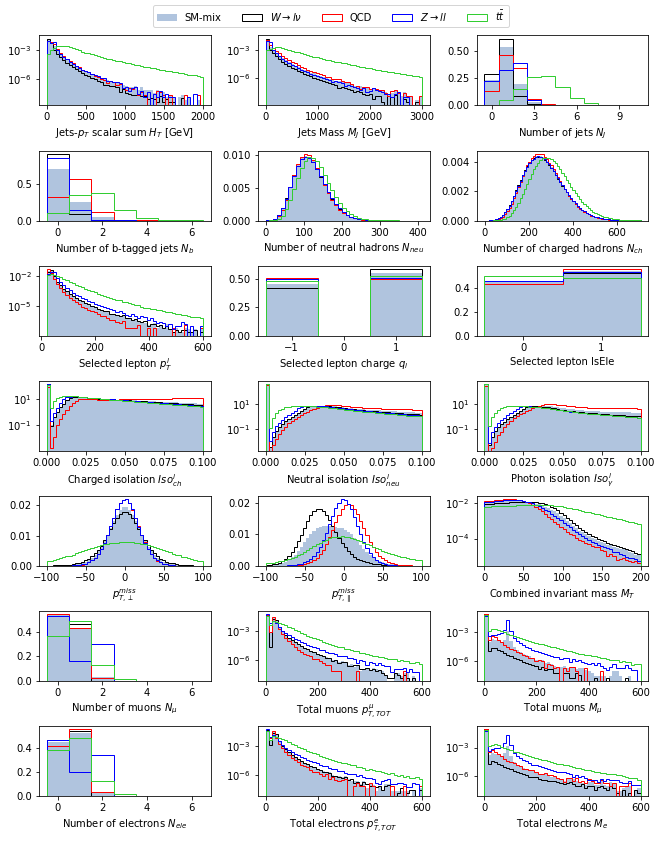

In [117]:
plot(sm_list, 'output/sm_pdfs.pdf')

0 HT
1 mass_jet
2 n_jet
3 n_bjet
4 n_neu
5 n_ch
6 lep_pt
7 lep_charge
8 lep_is_ele
9 lep_iso_ch
10 lep_iso_neu
11 lep_iso_gamma
12 METo
13 METp
14 MT
15 n_mu
16 pt_mu
17 mass_mu
18 n_ele
19 pt_ele
20 mass_ele


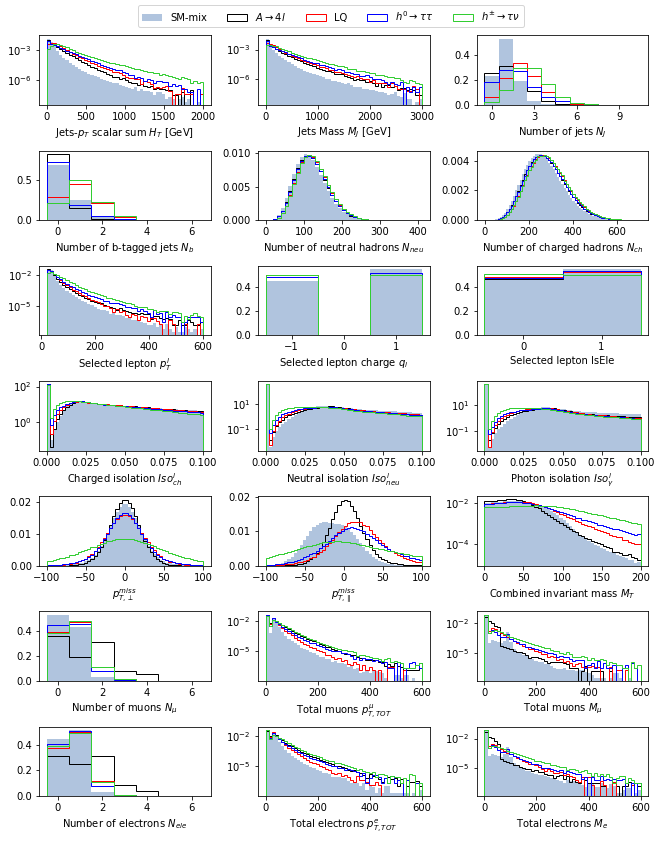

In [118]:
plot(bsm_list, 'output/bsm_pdfs.pdf')